# Импортируем библиотеки

In [2]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split

# Загружаем датасеты

In [3]:
# Загружаем данные

train_data = pd.read_csv('data/train_processed.csv')
valid_data = pd.read_csv('data/valid_processed.csv')

# Обучаем baseline модель

In [4]:
# Обучаем baseline модель на Random Forest

# Разделяем train датасет на таргет и признаки
X_train = train_data.drop(columns=['target'])  # Признаки
y_train = train_data['target']  # Таргет

# Разделяем valid датасет на таргет и признаки
X_valid = valid_data.drop(columns=['target']) # Признаки
y_valid = valid_data['target'] # Таргет

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Балансировка данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Обучаем модель
model = RandomForestClassifier(
    random_state=42
)
model.fit(X_train, y_train)

d:\ML\dota3.5\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\ML\dota3.5\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


RandomForestClassifier(random_state=42)

# Смотрим метрики модели

In [7]:
# Оцениваем baseline модель

# test выборка
test_predictions = model.predict(X_test)
test_probabilities = model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_presicion = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1score = f1_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# valid выборка
valid_predictions = model.predict(X_valid)
valid_probabilities = model.predict_proba(X_valid)[:, 1]

valid_accuracy = accuracy_score(y_valid, valid_predictions)
valid_presicion = precision_score(y_valid, valid_predictions)
valid_recall = recall_score(y_valid, valid_predictions)
valid_f1score = f1_score(y_valid, valid_predictions)
valid_roc_auc = roc_auc_score(y_valid, valid_probabilities)

# Выводим метрики
print(f"""Тест на тестовой выборке
Accuracy: {test_accuracy:.4f}
Precision: {test_presicion:.4f}
Recall: {test_recall:.4f}
F1-Score: {test_f1score:.4f}
ROC-AUC: {test_roc_auc:.4f}\n
""")

print(f"""Тест на валидационной выборке
Accuracy: {valid_accuracy:.4f}
Precision: {valid_presicion:.4f}
Recall: {valid_recall:.4f}
F1-Score: {valid_f1score:.4f}
ROC-AUC: {valid_roc_auc:.4f}
""")

# Accuracy - доля правильно спрогнозированных класов, не точен при дисбалансе
# Precision - доля правильно спрогнозированных класов среди положительных образцов
# Recall - доля правильно предсказанных положительных классов среди всех реальных положительных образцов
# F1-Score - среднее между precision и recall

Тест на тестовой выборке
Accuracy: 0.9841
Precision: 0.8033
Recall: 0.5904
F1-Score: 0.6806
ROC-AUC: 0.9732


Тест на валидационной выборке
Accuracy: 0.9843
Precision: 1.0000
Recall: 0.1364
F1-Score: 0.2400
ROC-AUC: 0.8039



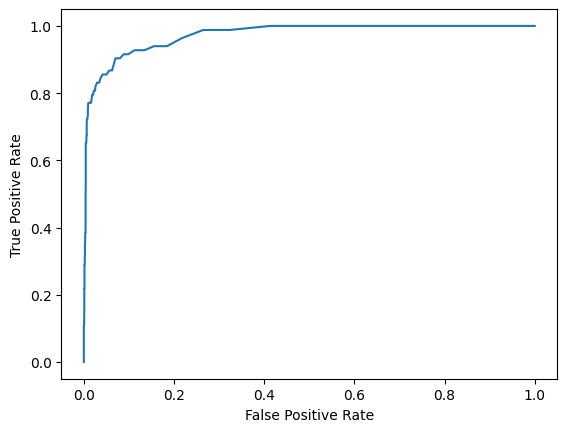

In [6]:
fpr, tpr, _ = roc_curve(y_test,  test_probabilities)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()